<a href="https://colab.research.google.com/github/dlachaud/Data201/blob/main/Project3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**By:**

Nathaniel Jackson

Nia Pillow

Natalie Smirnoff

Daniel Lachaud

Loann Daeninckx

We are sticking with our California Housing dataset for our third and final group project this semester. This dataset is featured in the book "Hands-on Machine Learning with Scikit-Learn and TensorFlow" written by Aurélien Géron. 

We were able to retrieve and download this dataset from Kaggle.com where it is described "as an excellent introduction to implementing machine learning algorithms because it requires [basic] data cleaning while containing a list of understandable variables". 
 
 
The California Housing Dataset has a usability rating that sits at 8.52 and contains aggregated housing data regarding each district from the 1990 California census. The dataset contains 10 variables in total ( 1 categorical, and 9 quantitative)… 



A quick glance at the variables contained in the California Housing Dataset. 

1. **longitude:** A measure of how far west a house is; a higher value is farther west

2. **latitude:** A measure of how far north a house is; a higher value is farther north

3. **housingMedianAge:** Median age of a house within a block; a lower number is a newer building

4. **totalRooms:** Total number of rooms within a block

5. **totalBedrooms:** Total number of bedrooms within a block

6. **population:** Total number of people residing within a block

7. **households:** Total number of households, a group of people residing within a home unit, for a block

8. **medianIncome:** Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. **medianHouseValue:** Median house value for households within a block (measured in US Dollars)

10. **oceanProximity:** Location of the house w.r.t ocean/sea


**Source:** https://www.kaggle.com/datasets/camnugent/california-housing-prices



Given our limited time for this project we have decided to use the same dataset from our previous project.  We will build two models that will

a) predict whether a house value is over $200k in value.
b) predict if a house value is under $200k, between 200k and $400k and above $400k.

This will allow us to dive into a better understanding of the basics of the codes and how logistic regression works.


In [242]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**Read in dataset**

In [243]:
df = pd.read_csv('housing.csv')  # index_col = 0)
# First 5 rows
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [244]:
df.shape

(20640, 10)

In [245]:
# Last five rows of dataset
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


 # Number of Null values in data



In [246]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [247]:
#Remove null values
# A model trained with the removal of all missing values creates a robust model

df1 = df.dropna()




Taking note from the previous project, we just dropped the nulls instead of using bfill. The percentage of missing values is not excessive in comparison to the complete dataset.

In [248]:
df1.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Dataframe summary 

In [249]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [250]:
#display a table of statistics
removcol= ['longitude','latitude']
df1.drop(columns=removcol).describe()

#df['housing_median_age',	'total_rooms',	'total_bedrooms', 'population', 'households', 'median_income','median_house_value'].describe(include ='all')

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [251]:
df1.shape

(20433, 10)

# Let's add another column to our dataset

Is the house over $$200k or under $200k in value?

We will assign the value of 0 to any house that is less than or equal to 200,000 dollars and a value of 1 to any house greater than 200,000 dollars.

In [252]:
# Adding a new column using the np.select() function
# create a list of our conditions
conditions = [
    (df1.median_house_value <= 200000),
    (df1.median_house_value >200000) 
    ]

# create a list of the values we want to assign for each condition
values = [0,1]

# create a new column and use np.select to assign values to it using our lists as arguments
df1['Outcome'] = np.select(conditions, values)

# Shuffle and display updated DataFrame
df1 = df1.sample(frac=1).reset_index(drop=True)
df1.head()

<ipython-input-252-f4713cda5171>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Outcome'] = np.select(conditions, values)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Outcome
0,-116.26,33.65,3.0,7437.0,1222.0,574.0,302.0,10.2948,382400.0,INLAND,1
1,-122.30,37.90,35.0,1102.0,308.0,688.0,303.0,2.3946,141700.0,NEAR BAY,0
2,-121.79,37.30,10.0,5469.0,950.0,3083.0,906.0,5.9399,241900.0,<1H OCEAN,1
3,-117.68,33.49,16.0,3084.0,724.0,2557.0,690.0,2.8357,106300.0,<1H OCEAN,0
4,-117.66,35.61,5.0,5735.0,932.0,2623.0,862.0,4.8494,87200.0,INLAND,0


## **Use scikit-learn logistic regression to train, test and predict a categorical target variable. Use appropriate metric and interpret the meaning of the score.**


## Selecting Features and Test/Train

In [253]:
# Arrange the data into features and target

features = ['housing_median_age',	'total_rooms', 'population', 'households', 'median_income']
X = df1.loc[:,features]
target = ['Outcome']
y = df1.loc[:, target]

# One vs. One

In [254]:
# Split the data into train and test Train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [255]:
# Shows the number of rows and columns for each variable
X_train.shape, y_train.shape

((15324, 5), (15324, 1))

In [256]:
X_test.shape, y_test.shape

((5109, 5), (5109, 1))

Instantiate, preprocess, train, and predict (test)

In [257]:
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [258]:
print('Classes', LogReg.classes_)
print("")
print('Intercept',LogReg.intercept_)
print("")
print("Coefficients", LogReg.coef_ )

Classes [0 1]

Intercept [-0.34482393]

Coefficients [[ 0.59622212 -0.92767918 -1.72014996  2.78313694  2.5285932 ]]


### Accuracy Score and Classification Report

In [259]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.8095517713838325
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2916
           1       0.80      0.73      0.77      2193

    accuracy                           0.81      5109
   macro avg       0.81      0.80      0.80      5109
weighted avg       0.81      0.81      0.81      5109



Our regressive model matches the data very well. Most of our performance metrics are above 0.8 suggesting our classification model perfoms very well.

### Confusion Matrix

In [260]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[2525,  391],
       [ 582, 1611]])

Text(0.5, 15.0, 'Predicted label')

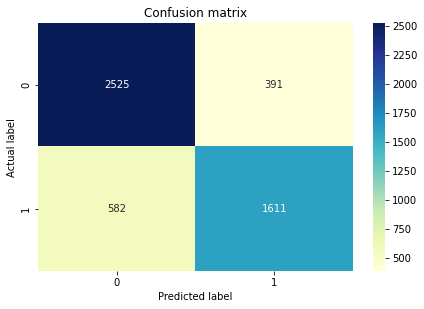

In [261]:
# Create chart for confusion matrix
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')







True Positive (TP) which refers to a sample belonging to the positive class being classified correctly.

The True Negative (TN) refers to a sample belonging to the negative class being classified correctly.

The False Positive (FP) refers to a sample belonging to the negative class but being classified wrongly as belonging to the positive class.

The False Negative (FN) refers to a sample belonging to the positive class but being classified wrongly as belonging to the negative class.



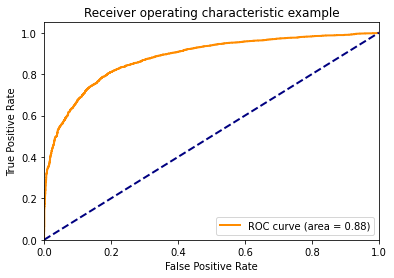

In [262]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
        lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The receiver operating characteristic example ROC curve area is 0.89. The closer the curve area is to one, the more accurate it is.

## **Logistic Regression**

## **Selecting Features to Test/Train**

## One vs. All

Adding a new column with multiple classes

In [263]:
# Adding a new column using the np.select() function
# create a list of our conditions
df2=df1
conditions = [
    (df2.median_house_value <= 200000),
    (df2.median_house_value > 200000) & (df2.median_house_value <=400000),
    (df2.median_house_value >400000) 
    ]

# create a list of the values we want to assign for each condition
values = [0,1,2]

# create a new column and use np.select to assign values to it using our lists as arguments
df2['Outcome2'] = np.select(conditions, values)

# Shuffle and display updated DataFrame
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Outcome,Outcome2
0,-116.26,33.65,3.0,7437.0,1222.0,574.0,302.0,10.2948,382400.0,INLAND,1,1
1,-122.30,37.90,35.0,1102.0,308.0,688.0,303.0,2.3946,141700.0,NEAR BAY,0,0
2,-121.79,37.30,10.0,5469.0,950.0,3083.0,906.0,5.9399,241900.0,<1H OCEAN,1,1
3,-117.68,33.49,16.0,3084.0,724.0,2557.0,690.0,2.8357,106300.0,<1H OCEAN,0,0
4,-117.66,35.61,5.0,5735.0,932.0,2623.0,862.0,4.8494,87200.0,INLAND,0,0


In the "Outcome2" column we maindained that:

0 = Houses less than or equal to $$200k

1 = Houses between $$200k and less than or equal to $400k

And added outcome where:

2 = Houses greater than $400k



In [264]:
# Arrange the data into features and target

features = ['housing_median_age','total_rooms','population','households','median_income']
X1 = df2.loc[:,features]
target = ['Outcome2']
y1 = df2.loc[:, target]

In [265]:
#Split the data into training and testing

X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.25, random_state=0)

In [266]:
# Create new data frame with y_train and X_Train value
columns = ['housing_median_age',	'total_rooms', 'population', 'households', 'median_income']
data =pd.DataFrame(X1_train, columns= columns)
data.insert(0, "Outcome2", y1_train)
data.head()

,Outcome2,housing_median_age,total_rooms,population,households,median_income
4866,0,25.0,2627.0,1059.0,338.0,3.6382
3759,1,13.0,3487.0,3749.0,1072.0,2.1602
4582,1,39.0,2686.0,1159.0,559.0,2.9441
35,1,25.0,1323.0,852.0,229.0,4.6167
13198,2,52.0,1234.0,543.0,213.0,6.0338


In [267]:
df2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
Outcome               0
Outcome2              0
dtype: int64

In [268]:
# Standardize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X1_train)

In [269]:
scaler = preprocessing.StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [270]:
# Create One-Vs-Rest Logistic Regression
clf = LogisticRegression(random_state=0, multi_class='ovr')

In [271]:
#Train One-Vs-Rest Logistic Regression
# Train model
model = clf.fit(X_std, y1_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [272]:
# Predict Observation’s Class
#model.predict(X1_test)
y_pred2=clf.predict(X1_test)

In [273]:
print('Classes', model.classes_)
print('')
print('Intercept',model.intercept_)
print('')
print("Coefficients", model.coef_ )


Classes [0 1 2]

Intercept [ 0.31874484 -0.72104821 -3.99607945]

Coefficients [[-0.62887127  0.86498275  1.668463   -2.63692177 -2.50197194]
 [ 0.16354683 -0.22092931 -0.76697741  1.11072486  0.68489204]
 [ 0.75010843  0.51176817 -3.30727635  2.32696142  1.85316766]]


In [274]:
print("Accuracy", clf.score(X1_test, y1_test))
print(classification_report(y1_test, clf.predict(X1_test)))

Accuracy 0.7561166568800156
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2965
           1       0.67      0.59      0.63      1691
           2       0.90      0.29      0.44       453

    accuracy                           0.76      5109
   macro avg       0.79      0.60      0.64      5109
weighted avg       0.76      0.76      0.74      5109



This model performs slightly poorer than the one above given the lower scores. Clearly adding an additional value range confuses things a little bit and makes it less accurate.

In [275]:
conf_mat = confusion_matrix(y1_test, y_pred2)
conf_mat

array([[2735,  227,    3],
       [ 684,  996,   11],
       [  57,  264,  132]])

Text(0.5, 15.0, 'Predicted label')

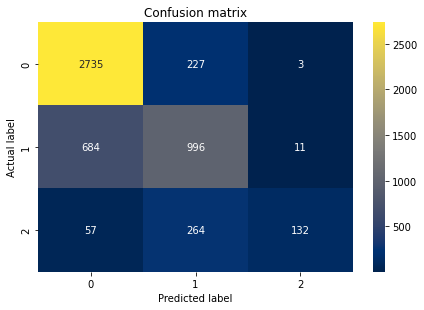

In [276]:
categories = [0,1, 2] 
fig, ax = plt.subplots()
plt.xticks([0,1,2], categories)
plt.yticks([0,1,2], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="cividis" ,fmt='g')
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Unlike binary classification, there are no positive or negative classes here. At first, it might be a little difficult to find TP, TN, FP and FN since there are no positive or negative classes, but it’s actually pretty easy.

From Left to Right:

TP FP FP

FN TN TN

FN TN TN



## **F1 Score: 1vAll**

In [277]:
print("Accuracy:", accuracy_score(y1_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.4867880211391662
Precision: 0.8046953046953047
Recall: 0.7346101231190151


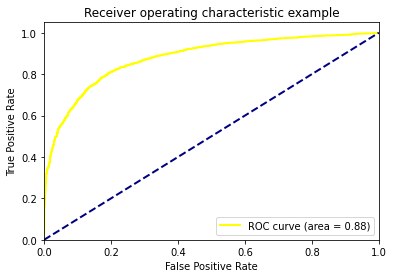

In [278]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='yellow',
        lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **Thoughts, Observations, Interpretations, and Conclusion**

**Dummy Classifier**

We chose not to pursue using the dummy classifier because we don't have an inbalance in our classes. If we had an overwhelming amount of observations fall into one category or the other we would have but the categories have enough in both that we don't feel like we need to.

After running all of our code in, we concluded that our models for One v. One and One v. All are very accurate with their predictions. Both models had a rather high ROC curve area, which shows that the model does a pretty good job of differentiationg between houses being worth under $$200k, between $200k and $400k, and over $400k, based on the features input. The second model seems to have had a more difficult time as there were more false results in the over $200k to over $400k classes than where it simply had to differentiate between 2 classes. However, given that the two ROC curve areas were the same, it's more likely that the 2 models had their errors ditributed differently but did not have much of a difference in overall accuracy.

# **Other Chunks We Considered Working**

Below are other ideas we considered but ultimately unded up not doing anythign with. 

Building a model using OceanProximity as the target.